In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings

# Análise Exploratória: Relação entre Desmatamento e PIB no Pará
# ===================================================


In [2]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [3]:
def formatar_valor_reais(valor):
    """Formata um valor monetário em R$ para exibição"""
    return f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

In [4]:
print("1. Carregando os datasets...")

# Caminho para os arquivos
caminho_desmatamento = "prodes/desmatamento_prodes_para_municipios_2008_2024.csv"
caminho_pib = "ibge/data/processed/pib_para_estudo.csv"

1. Carregando os datasets...


In [5]:
# Carregando os dataframes
try:
    # Carregando dados de desmatamento
    df_desmatamento = pd.read_csv(caminho_desmatamento)
    print(f"Dataset de desmatamento carregado. Dimensões: {df_desmatamento.shape}")

    # Carregando dados do PIB
    df_pib = pd.read_csv(caminho_pib)
    print(f"Dataset de PIB carregado. Dimensões: {df_pib.shape}")

except Exception as e:
    print(f"Erro ao carregar os dados: {e}")
    # Caso haja erro no carregamento, vamos usar um caminho relativo alternativo
    try:
        df_desmatamento = pd.read_csv("desmatamento_prodes_para_municipios_2008_2024.csv")
        df_pib = pd.read_csv("pib_para_estudo.csv")
        print("Dados carregados usando caminho alternativo.")
    except Exception as e:
        print(f"Erro ao usar caminho alternativo: {e}")


Dataset de desmatamento carregado. Dimensões: (2069, 3)
Dataset de PIB carregado. Dimensões: (1725, 17)


In [6]:
# 2. Explorando os dados iniciais
# ------------------------------
print("\n2. Explorando os dados iniciais...")

# Explorando o dataset de desmatamento
print("\nPrimeiras linhas do dataset de desmatamento:")
display(df_desmatamento.head())

print("\nInformações do dataset de desmatamento:")
display(df_desmatamento.info())

print("\nEstatísticas descritivas do dataset de desmatamento:")
display(df_desmatamento.describe())

# Explorando o dataset do PIB
print("\nPrimeiras linhas do dataset do PIB:")
display(df_pib.head())

print("\nInformações do dataset do PIB:")
display(df_pib.info())

print("\nEstatísticas descritivas do dataset do PIB:")
display(df_pib.describe())



2. Explorando os dados iniciais...

Primeiras linhas do dataset de desmatamento:


,NM_MUN,year,area_km
0,Abaetetuba,2008.0,1.387703
1,Abaetetuba,2009.0,3.052675
2,Abaetetuba,2010.0,4.072398
3,Abaetetuba,2011.0,0.855958
4,Abaetetuba,2012.0,2.299493



Informações do dataset de desmatamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NM_MUN   2069 non-null   object 
 1   year     2069 non-null   float64
 2   area_km  2069 non-null   float64
dtypes: float64(2), object(1)
memory usage: 48.6+ KB


None


Estatísticas descritivas do dataset de desmatamento:


,year,area_km
count,2069.000000,2069.000000
mean,2015.449976,26.069382
std,4.641295,68.884935
min,2008.000000,0.050672
25%,2011.000000,0.682021
50%,2016.000000,3.622243
75%,2020.000000,19.994520
max,2023.000000,873.593375



Primeiras linhas do dataset do PIB:


,ANO,codigo_municipio,municipio,codigo_microrregiao,microrregiao,amazonia_legal,"Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)",valor_industria,valor_servicos,valor_administracao_publica,valor_total,impostos,pib,pib_per_capita,principal_atividade,segunda_atividade,terceira_atividade
0,2010,1500107,Abaetetuba,15011,Cametá,Sim,71932.591,31239.975,201654.938,241973.245,546800.749,36992.704,583793.453,4138.79,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
1,2010,1500131,Abel Figueiredo,15017,Paragominas,Sim,22231.703,3926.601,10937.579,14547.786,51643.669,1955.029,53598.698,7891.45,"Administração, defesa, educação e saúde públic...","Agricultura, inclusive apoio à agricultura e a...","Pecuária, inclusive apoio à pecuária"
2,2010,1500206,Acará,15012,Tomé-Açu,Sim,225732.825,47125.179,51364.283,106767.078,430989.365,9778.087,440767.452,8222.51,"Agricultura, inclusive apoio à agricultura e a...","Administração, defesa, educação e saúde públic...",Demais serviços
3,2010,1500305,Afuá,15005,Furos de Breves,Sim,55457.345,9664.908,20205.317,72154.605,157482.176,3810.983,161293.159,4606.14,"Administração, defesa, educação e saúde públic...","Agricultura, inclusive apoio à agricultura e a...",Demais serviços
4,2010,1500347,Água Azul do Norte,15019,Parauapebas,Sim,62260.357,46264.869,17439.590,40876.202,166841.018,14032.234,180873.251,7217.32,"Pecuária, inclusive apoio à pecuária",Indústrias de transformação,"Administração, defesa, educação e saúde públic..."



Informações do dataset do PIB:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   ANO                                                                    1725 non-null   int64  
 1   codigo_municipio                                                       1725 non-null   int64  
 2   municipio                                                              1725 non-null   object 
 3   codigo_microrregiao                                                    1725 non-null   int64  
 4   microrregiao                                                           1725 non-null   object 
 5   amazonia_legal                                                         1725 non-null   object 
 6   Valor adicionado bruto da Agropecuária, a preços corrent

None


Estatísticas descritivas do dataset do PIB:


,ANO,codigo_municipio,codigo_microrregiao,"Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)",valor_industria,valor_servicos,valor_administracao_publica,valor_total,impostos,pib,pib_per_capita
count,1725.000000,1.725000e+03,1725.000000,1.725000e+03,1.725000e+03,1.725000e+03,1.725000e+03,1.725000e+03,1.725000e+03,1.725000e+03,1725.000000
mean,2015.507826,1.504469e+06,15011.586087,1.029250e+05,3.297685e+05,3.188369e+05,1.866795e+05,9.382099e+05,9.198865e+04,1.030199e+06,14651.962568
std,3.450776,2.421414e+03,5.750238,1.195528e+05,1.901375e+06,1.409980e+06,4.008181e+05,3.079313e+06,4.097748e+05,3.408549e+06,33053.679575
min,2010.000000,1.500107e+06,15001.000000,1.791832e+03,-6.272569e+03,3.224613e+03,8.473016e+03,2.276090e+04,3.941530e+02,2.315505e+04,2792.870000
25%,2013.000000,1.502400e+06,15007.000000,3.322884e+04,5.821783e+03,2.413736e+04,5.675208e+04,1.449672e+05,4.583818e+03,1.515199e+05,6819.620000
50%,2016.000000,1.504604e+06,15011.000000,6.636383e+04,1.648134e+04,5.309754e+04,1.007669e+05,2.799451e+05,1.153622e+04,2.927546e+05,9104.590000
75%,2019.000000,1.506500e+06,15016.000000,1.275497e+05,6.555537e+04,1.437713e+05,1.786375e+05,5.712945e+05,3.861270e+04,6.139536e+05,14164.300000
max,2021.000000,1.508407e+06,15022.000000,1.376072e+06,4.065967e+07,1.806130e+07,5.719640e+06,4.835668e+07,6.341813e+06,4.976304e+07,894806.280000


# 3. Pré-processamento dos dados
# -----------------------------

In [7]:
print("\n3. Pré-processamento dos dados...")

# Verificando e tratando valores nulos
print("\nValores nulos no dataset de desmatamento:")
print(df_desmatamento.isnull().sum())

print("\nValores nulos no dataset do PIB:")
print(df_pib.isnull().sum())



3. Pré-processamento dos dados...

Valores nulos no dataset de desmatamento:
NM_MUN     0
year       0
area_km    0
dtype: int64

Valores nulos no dataset do PIB:
ANO                                                                      0
codigo_municipio                                                         0
municipio                                                                0
codigo_microrregiao                                                      0
microrregiao                                                             0
amazonia_legal                                                           0
Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)    0
valor_industria                                                          0
valor_servicos                                                           0
valor_administracao_publica                                              0
valor_total                                                              0
impostos   

In [8]:
# Padronizando os nomes das colunas e ajustando tipos de dados
# Vamos garantir que temos colunas padronizadas para o merge posterior

# Para o dataset de desmatamento
if 'NM_MUN' in df_desmatamento.columns:
    df_desmatamento = df_desmatamento.rename(columns={'NM_MUN': 'municipio', 'year': 'ano', 'area_km': 'area_desmatada_km2'})
elif 'municipio' in df_desmatamento.columns:
    if 'ANO' in df_desmatamento.columns:
        df_desmatamento = df_desmatamento.rename(columns={'ANO': 'ano'})
    if 'area_km' in df_desmatamento.columns:
        df_desmatamento = df_desmatamento.rename(columns={'area_km': 'area_desmatada_km2'})


In [9]:
# Para o dataset do PIB
if 'ANO' in df_pib.columns:
    df_pib = df_pib.rename(columns={'ANO': 'ano'})
elif 'year' in df_pib.columns:
    df_pib = df_pib.rename(columns={'year': 'ano'})

if 'NM_MUN' in df_pib.columns:
    df_pib = df_pib.rename(columns={'NM_MUN': 'municipio'})


In [10]:
# Convertendo tipos de dados
if 'ano' in df_desmatamento.columns:
    df_desmatamento['ano'] = df_desmatamento['ano'].astype(int)
if 'ano' in df_pib.columns:
    df_pib['ano'] = df_pib['ano'].astype(int)

print("\nColunas após padronização - Desmatamento:")
print(df_desmatamento.columns.tolist())

print("\nColunas após padronização - PIB:")
print(df_pib.columns.tolist())


Colunas após padronização - Desmatamento:
['municipio', 'ano', 'area_desmatada_km2']

Colunas após padronização - PIB:
['ano', 'codigo_municipio', 'municipio', 'codigo_microrregiao', 'microrregiao', 'amazonia_legal', 'Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)', 'valor_industria', 'valor_servicos', 'valor_administracao_publica', 'valor_total', 'impostos', 'pib', 'pib_per_capita', 'principal_atividade', 'segunda_atividade', 'terceira_atividade']


# 4. Combinando os datasets para análise conjunta
# ----------------------------------------------

In [11]:
print("\n4. Combinando os datasets para análise conjunta...")

# Vamos combinar os datasets pelo município e ano para análises conjuntas
# Primeiro verificamos o período de tempo disponível em cada dataset

print("\nPeríodo de anos no dataset de desmatamento:")
print(df_desmatamento['ano'].unique())

print("\nPeríodo de anos no dataset do PIB:")
print(df_pib['ano'].unique())



4. Combinando os datasets para análise conjunta...

Período de anos no dataset de desmatamento:
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023]

Período de anos no dataset do PIB:
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


In [12]:
# Realizando o merge dos datasets
try:
    # Tentando merge pelos nomes das colunas padronizados
    df_combinado = pd.merge(df_desmatamento, df_pib, on=['municipio', 'ano'], how='inner')
    print(f"\nDataset combinado criado com sucesso. Dimensões: {df_combinado.shape}")
except Exception as e:
    # Se falhar, vamos tentar identificar os nomes corretos das colunas
    print(f"Erro ao combinar datasets: {e}")
    print("Tentando identificar colunas corretas para merge...")

    # Checando quais colunas poderiam ser usadas para município e ano
    colunas_municipio_desmatamento = [col for col in df_desmatamento.columns if 'mun' in col.lower()]
    colunas_ano_desmatamento = [col for col in df_desmatamento.columns if 'ano' in col.lower() or 'year' in col.lower()]

    colunas_municipio_pib = [col for col in df_pib.columns if 'mun' in col.lower()]
    colunas_ano_pib = [col for col in df_pib.columns if 'ano' in col.lower() or 'year' in col.lower()]

    print(f"Possíveis colunas de município no dataset de desmatamento: {colunas_municipio_desmatamento}")
    print(f"Possíveis colunas de ano no dataset de desmatamento: {colunas_ano_desmatamento}")
    print(f"Possíveis colunas de município no dataset do PIB: {colunas_municipio_pib}")
    print(f"Possíveis colunas de ano no dataset do PIB: {colunas_ano_pib}")

    # Tentando merge com as primeiras colunas identificadas
    if colunas_municipio_desmatamento and colunas_ano_desmatamento and colunas_municipio_pib and colunas_ano_pib:
        df_desmatamento = df_desmatamento.rename(columns={
            colunas_municipio_desmatamento[0]: 'municipio_merge',
            colunas_ano_desmatamento[0]: 'ano_merge'
        })

        df_pib = df_pib.rename(columns={
            colunas_municipio_pib[0]: 'municipio_merge',
            colunas_ano_pib[0]: 'ano_merge'
        })

        df_combinado = pd.merge(df_desmatamento, df_pib, on=['municipio_merge', 'ano_merge'], how='inner')
        print(f"\nDataset combinado criado com colunas alternativas. Dimensões: {df_combinado.shape}")



Dataset combinado criado com sucesso. Dimensões: (1545, 18)


In [13]:
# Verificando o dataset combinado
print("\nPrimeiras linhas do dataset combinado:")
display(df_combinado.head())

print("\nInformações do dataset combinado:")
display(df_combinado.info())


Primeiras linhas do dataset combinado:


,municipio,ano,area_desmatada_km2,codigo_municipio,codigo_microrregiao,microrregiao,amazonia_legal,"Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)",valor_industria,valor_servicos,valor_administracao_publica,valor_total,impostos,pib,pib_per_capita,principal_atividade,segunda_atividade,terceira_atividade
0,Abaetetuba,2010,4.072398,1500107,15011,Cametá,Sim,71932.591,31239.975,201654.938,241973.245,546800.749,36992.704,583793.453,4138.79,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
1,Abaetetuba,2011,0.855958,1500107,15011,Cametá,Sim,88434.834,44167.308,247545.097,282136.903,662284.143,47599.463,709883.606,4971.70,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
2,Abaetetuba,2012,2.299493,1500107,15011,Cametá,Sim,115890.035,36469.750,276895.196,316856.722,746111.702,51941.577,798053.279,5526.11,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
3,Abaetetuba,2013,0.448690,1500107,15011,Cametá,Sim,136078.479,37866.697,300364.009,355559.905,829869.091,61559.260,891428.350,6053.14,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
4,Abaetetuba,2014,0.243939,1500107,15011,Cametá,Sim,125398.044,60020.825,391208.633,400442.386,977069.888,79489.390,1056559.278,7097.05,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...



Informações do dataset combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 18 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   municipio                                                              1545 non-null   object 
 1   ano                                                                    1545 non-null   int64  
 2   area_desmatada_km2                                                     1545 non-null   float64
 3   codigo_municipio                                                       1545 non-null   int64  
 4   codigo_microrregiao                                                    1545 non-null   int64  
 5   microrregiao                                                           1545 non-null   object 
 6   amazonia_legal                                       

None

# 5. Análise Exploratória de Dados
# -------------------------------

In [14]:
# 5.1. Estatísticas descritivas básicas
print("\n5.1. Estatísticas descritivas básicas")
numeric_columns = df_combinado.select_dtypes(include=['int64', 'float64']).columns
estatisticas_desc = df_combinado[numeric_columns].describe()
display(estatisticas_desc)


5.1. Estatísticas descritivas básicas


,ano,area_desmatada_km2,codigo_municipio,codigo_microrregiao,"Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)",valor_industria,valor_servicos,valor_administracao_publica,valor_total,impostos,pib,pib_per_capita
count,1545.000000,1545.000000,1.545000e+03,1545.000000,1.545000e+03,1.545000e+03,1.545000e+03,1.545000e+03,1.545000e+03,1.545000e+03,1.545000e+03,1545.000000
mean,2015.517152,23.854803,1.504488e+06,15011.937217,1.090506e+05,3.530573e+05,3.033119e+05,1.829920e+05,9.484119e+05,8.859705e+04,1.037009e+06,15338.503346
std,3.487746,64.700334,2.419571e+03,5.876476,1.234104e+05,2.000963e+06,1.354370e+06,3.886078e+05,3.113346e+06,3.987954e+05,3.425472e+06,34839.952946
min,2010.000000,0.050672,1.500107e+06,15001.000000,1.833088e+03,-6.272569e+03,3.224613e+03,8.473016e+03,2.276090e+04,3.941530e+02,2.315505e+04,2792.870000
25%,2012.000000,0.621673,1.502509e+06,15008.000000,3.710713e+04,6.336606e+03,2.502701e+04,5.822708e+04,1.512454e+05,4.936801e+03,1.579496e+05,7008.050000
50%,2016.000000,3.073817,1.504703e+06,15012.000000,7.148006e+04,1.840506e+04,5.708377e+04,1.029482e+05,2.912704e+05,1.256511e+04,3.093279e+05,9383.670000
75%,2019.000000,18.732194,1.506500e+06,15017.000000,1.369298e+05,6.928329e+04,1.466158e+05,1.835711e+05,5.954566e+05,4.052003e+04,6.257596e+05,14759.410000
max,2021.000000,873.593375,1.508407e+06,15022.000000,1.376072e+06,4.065967e+07,1.806130e+07,5.719640e+06,4.835668e+07,6.341813e+06,4.976304e+07,894806.280000



5.2. Tendências de desmatamento ao longo do tempo


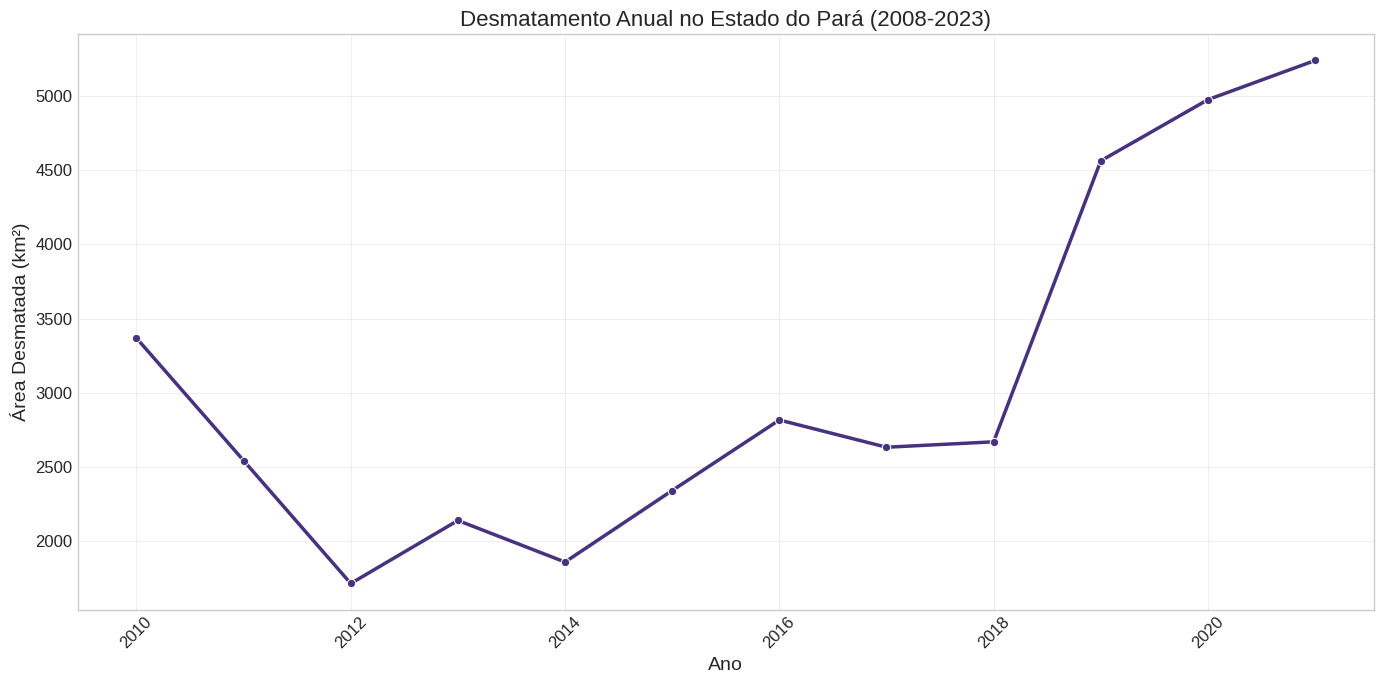

In [15]:
# 5.2. Tendências de desmatamento ao longo do tempo
print("\n5.2. Tendências de desmatamento ao longo do tempo")

# Agrupando por ano e calculando o total de área desmatada
desmatamento_anual = df_combinado.groupby('ano')['area_desmatada_km2'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='ano', y='area_desmatada_km2', data=desmatamento_anual, marker='o', linewidth=2.5)
plt.title('Desmatamento Anual no Estado do Pará (2008-2023)', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Área Desmatada (km²)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5.3. Relação entre desmatamento e PIB
Colunas relacionadas ao PIB: ['pib', 'pib_per_capita']
Usando a coluna PIB: pib


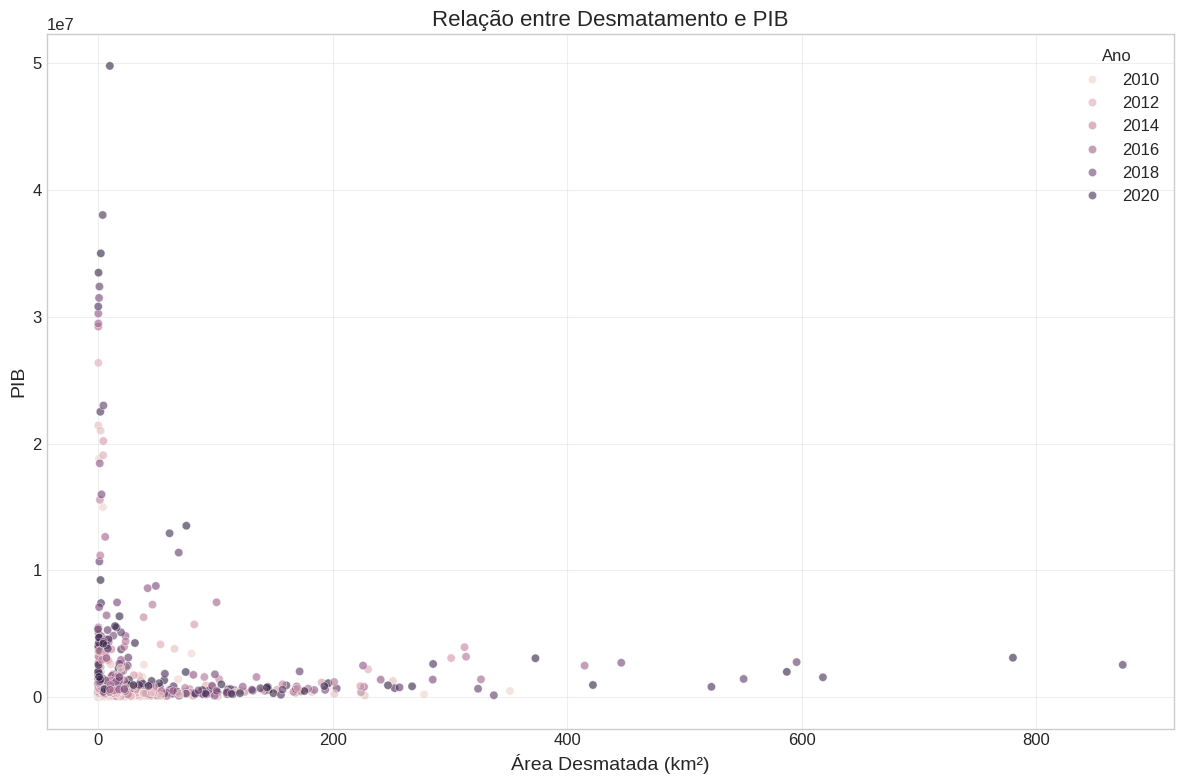


Correlação entre Desmatamento e PIB: 0.0178


In [16]:
# 5.3. Relação entre desmatamento e PIB
print("\n5.3. Relação entre desmatamento e PIB")

# Verificando se existem colunas relacionadas ao PIB no dataset combinado
colunas_pib = [col for col in df_combinado.columns if 'pib' in col.lower()]
print(f"Colunas relacionadas ao PIB: {colunas_pib}")

# Se não encontrarmos colunas de PIB, vamos usar outras colunas econômicas disponíveis
if not colunas_pib:
    colunas_economicas = [col for col in df_combinado.columns if any(termo in col.lower() for termo in ['valor', 'econom', 'industr', 'agro', 'servi'])]
    print(f"Colunas econômicas alternativas: {colunas_economicas}")

    if colunas_economicas:
        # Usando a primeira coluna econômica encontrada para análise
        coluna_economica = colunas_economicas[0]
        print(f"Usando a coluna econômica: {coluna_economica}")

        # Scatter plot: Desmatamento vs Indicador Econômico
        plt.figure(figsize=(12, 8))
        sns.scatterplot(x='area_desmatada_km2', y=coluna_economica, data=df_combinado, alpha=0.6, hue='ano')
        plt.title(f'Relação entre Desmatamento e {coluna_economica}', fontsize=16)
        plt.xlabel('Área Desmatada (km²)', fontsize=14)
        plt.ylabel(coluna_economica, fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.legend(title='Ano')
        plt.tight_layout()
        plt.show()

        # Calculando correlação
        correlacao = df_combinado[['area_desmatada_km2', coluna_economica]].corr().iloc[0, 1]
        print(f"\nCorrelação entre Desmatamento e {coluna_economica}: {correlacao:.4f}")
else:
    # Se encontrarmos colunas de PIB, vamos usar a primeira para análise
    coluna_pib = colunas_pib[0]
    print(f"Usando a coluna PIB: {coluna_pib}")

    # Scatter plot: Desmatamento vs PIB
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='area_desmatada_km2', y=coluna_pib, data=df_combinado, alpha=0.6, hue='ano')
    plt.title('Relação entre Desmatamento e PIB', fontsize=16)
    plt.xlabel('Área Desmatada (km²)', fontsize=14)
    plt.ylabel('PIB', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Ano')
    plt.tight_layout()
    plt.show()

    # Calculando correlação
    correlacao = df_combinado[['area_desmatada_km2', coluna_pib]].corr().iloc[0, 1]
    print(f"\nCorrelação entre Desmatamento e PIB: {correlacao:.4f}")



5.4. Análise de municípios com maior desmatamento


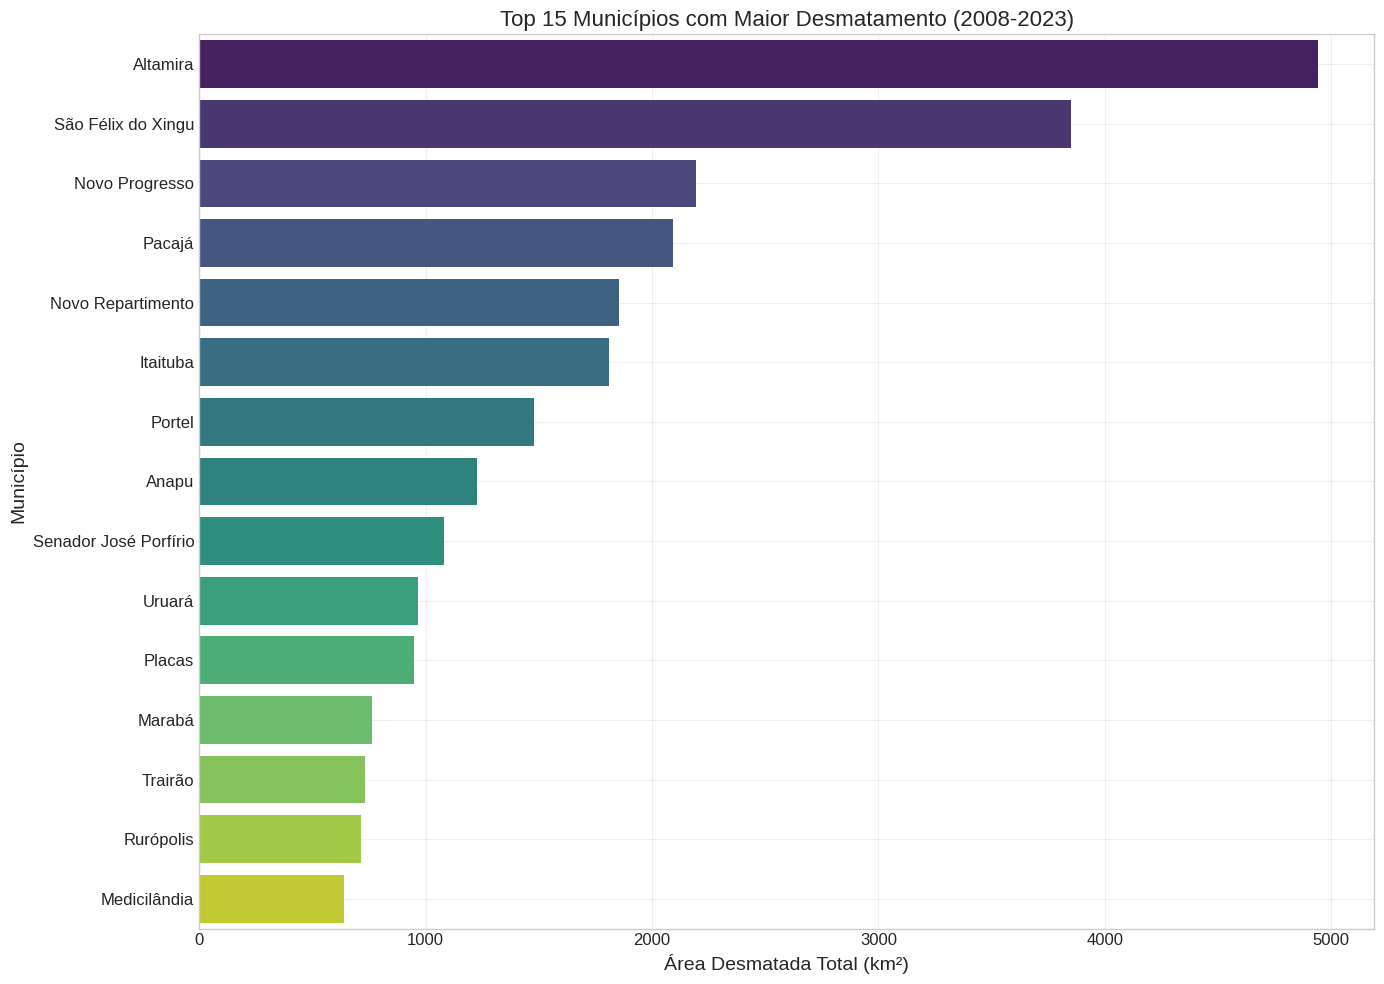

In [17]:
# 5.4. Análise de municípios com maior desmatamento
print("\n5.4. Análise de municípios com maior desmatamento")

# Agrupando por município e calculando o total de área desmatada
desmatamento_por_municipio = df_combinado.groupby('municipio')['area_desmatada_km2'].sum().reset_index()
desmatamento_por_municipio = desmatamento_por_municipio.sort_values('area_desmatada_km2', ascending=False)

# Top 15 municípios com maior desmatamento
top_15_municipios = desmatamento_por_municipio.head(15)

plt.figure(figsize=(14, 10))
sns.barplot(x='area_desmatada_km2', y='municipio', data=top_15_municipios, palette='viridis')
plt.title('Top 15 Municípios com Maior Desmatamento (2008-2023)', fontsize=16)
plt.xlabel('Área Desmatada Total (km²)', fontsize=14)
plt.ylabel('Município', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



5.5. Análise da relação temporal entre desmatamento e indicadores econômicos

Correlações com efeitos defasados:
Desmatamento atual vs pib: 0.9318
Desmatamento do ano anterior vs pib: 0.9163
Desmatamento de dois anos atrás vs pib: 0.6953


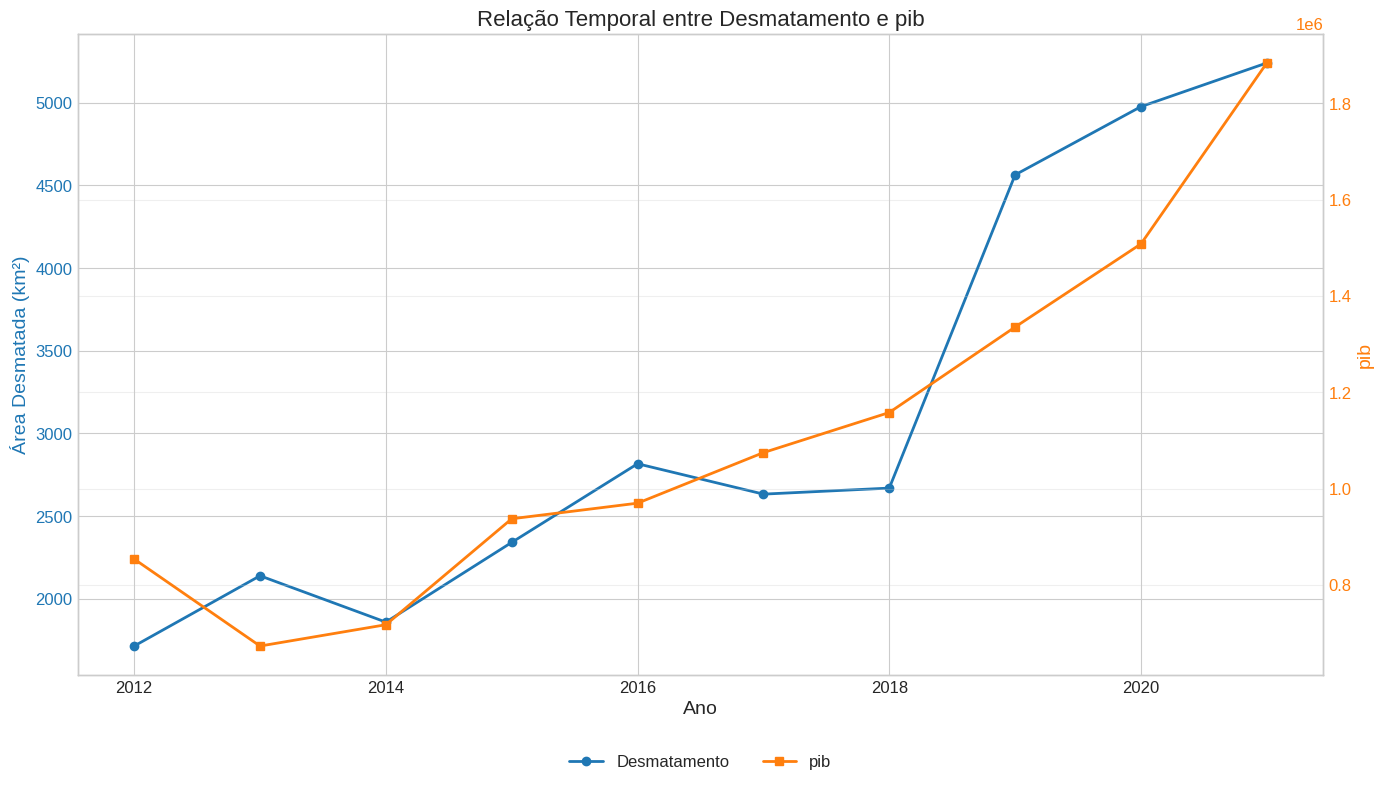

In [18]:
# 5.5. Análise da relação temporal entre desmatamento e indicadores econômicos
print("\n5.5. Análise da relação temporal entre desmatamento e indicadores econômicos")

# Vamos analisar se o desmatamento em um ano afeta o PIB nos anos seguintes
# Para isso, vamos criar um dataframe com médias anuais

# Verificando se temos dados de PIB/indicadores econômicos
if colunas_pib or colunas_economicas:
    # Definindo a coluna econômica a ser usada
    coluna_economica_final = coluna_pib if colunas_pib else coluna_economica

    # Agrupando por ano e calculando médias
    metricas_anuais = df_combinado.groupby('ano').agg({
        'area_desmatada_km2': 'sum',
        coluna_economica_final: 'mean'
    }).reset_index()

    # Criando colunas de lag para desmatamento (1 e 2 anos)
    metricas_anuais['desmatamento_lag1'] = metricas_anuais['area_desmatada_km2'].shift(1)
    metricas_anuais['desmatamento_lag2'] = metricas_anuais['area_desmatada_km2'].shift(2)

    # Removendo linhas com valores nulos (devido aos lags)
    metricas_anuais = metricas_anuais.dropna()

    # Calculando correlações para efeitos defasados
    print("\nCorrelações com efeitos defasados:")
    print(f"Desmatamento atual vs {coluna_economica_final}: {metricas_anuais[['area_desmatada_km2', coluna_economica_final]].corr().iloc[0, 1]:.4f}")
    print(f"Desmatamento do ano anterior vs {coluna_economica_final}: {metricas_anuais[['desmatamento_lag1', coluna_economica_final]].corr().iloc[0, 1]:.4f}")
    print(f"Desmatamento de dois anos atrás vs {coluna_economica_final}: {metricas_anuais[['desmatamento_lag2', coluna_economica_final]].corr().iloc[0, 1]:.4f}")

    # Gráfico de linhas para visualizar as tendências
    plt.figure(figsize=(14, 8))

    # Criando eixo primário para desmatamento
    ax1 = plt.gca()
    ax1.set_xlabel('Ano', fontsize=14)
    ax1.set_ylabel('Área Desmatada (km²)', color='tab:blue', fontsize=14)
    ax1.plot(metricas_anuais['ano'], metricas_anuais['area_desmatada_km2'], 'o-', color='tab:blue', linewidth=2, label='Desmatamento')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Criando eixo secundário para PIB/indicador econômico
    ax2 = ax1.twinx()
    ax2.set_ylabel(coluna_economica_final, color='tab:orange', fontsize=14)
    ax2.plot(metricas_anuais['ano'], metricas_anuais[coluna_economica_final], 's-', color='tab:orange', linewidth=2, label=coluna_economica_final)
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Título e legenda combinados
    plt.title(f'Relação Temporal entre Desmatamento e {coluna_economica_final}', fontsize=16)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


# 6. Análise de regressão
# ----------------------


6.1. Regressão linear simples

Resultados da regressão linear simples:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4900
Date:                Sun, 11 May 2025   Prob (F-statistic):              0.484
Time:                        23:34:05   Log-Likelihood:                -25439.
No. Observations:                1545   AIC:                         5.088e+04
Df Residuals:                    1543   BIC:                         5.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

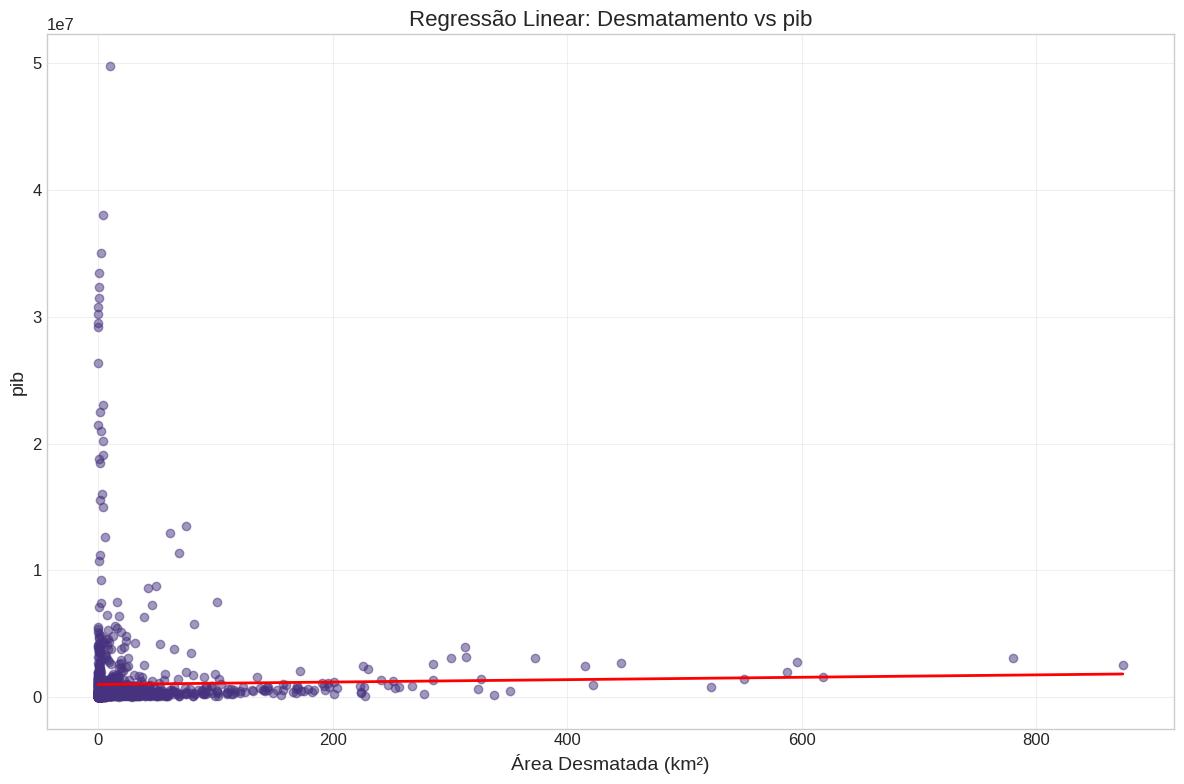

In [19]:
# 6.1. Regressão linear simples
print("\n6.1. Regressão linear simples")

if colunas_pib or colunas_economicas:
    coluna_economica_final = coluna_pib if colunas_pib else coluna_economica

    # Preparando dados para regressão
    X = df_combinado['area_desmatada_km2'].values.reshape(-1, 1)
    y = df_combinado[coluna_economica_final].values

    # Adicionando constante para o intercepto
    X_const = sm.add_constant(X)

    # Ajustando o modelo
    modelo = sm.OLS(y, X_const).fit()

    # Exibindo resultados da regressão
    print("\nResultados da regressão linear simples:")
    print(modelo.summary())

    # Salvando os coeficientes e p-valores para interpretação
    intercepto = modelo.params[0]
    coef_desmatamento = modelo.params[1]
    p_valor_desmatamento = modelo.pvalues[1]
    r_quadrado = modelo.rsquared

    print(f"\nInterpretação:")
    print(f"Intercepto: {intercepto:.4f}")
    print(f"Coeficiente de Desmatamento: {coef_desmatamento:.4f}")
    print(f"p-valor para Desmatamento: {p_valor_desmatamento:.4f}")
    print(f"R² (coeficiente de determinação): {r_quadrado:.4f}")

    if p_valor_desmatamento < 0.05:
        if coef_desmatamento > 0:
            print(f"O desmatamento está positivamente associado com {coluna_economica_final} (p < 0.05).")
        else:
            print(f"O desmatamento está negativamente associado com {coluna_economica_final} (p < 0.05).")
    else:
        print(f"Não há evidência estatística de associação entre desmatamento e {coluna_economica_final} (p > 0.05).")

    # Visualizando a regressão
    plt.figure(figsize=(12, 8))
    plt.scatter(X, y, alpha=0.5)

    # Adicionando a linha de regressão
    x_range = np.linspace(X.min(), X.max(), 100)
    y_pred = intercepto + coef_desmatamento * x_range
    plt.plot(x_range, y_pred, 'r-', linewidth=2)

    plt.title(f'Regressão Linear: Desmatamento vs {coluna_economica_final}', fontsize=16)
    plt.xlabel('Área Desmatada (km²)', fontsize=14)
    plt.ylabel(coluna_economica_final, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


6.2. Análise por município

Municípios com maior correlação (em módulo) entre desmatamento e indicador econômico:


,municipio,correlacao,n_observacoes
56,Jacareacanga,0.929446,12
75,Novo Progresso,0.829951,12
54,Itaituba,0.816426,12
131,Uruará,0.783461,12
89,Portel,0.773759,12
97,Rurópolis,0.761978,12
3,Afuá,-0.744507,6
40,Curuá,0.742188,12
88,Placas,0.730750,12
34,Colares,-0.718584,6


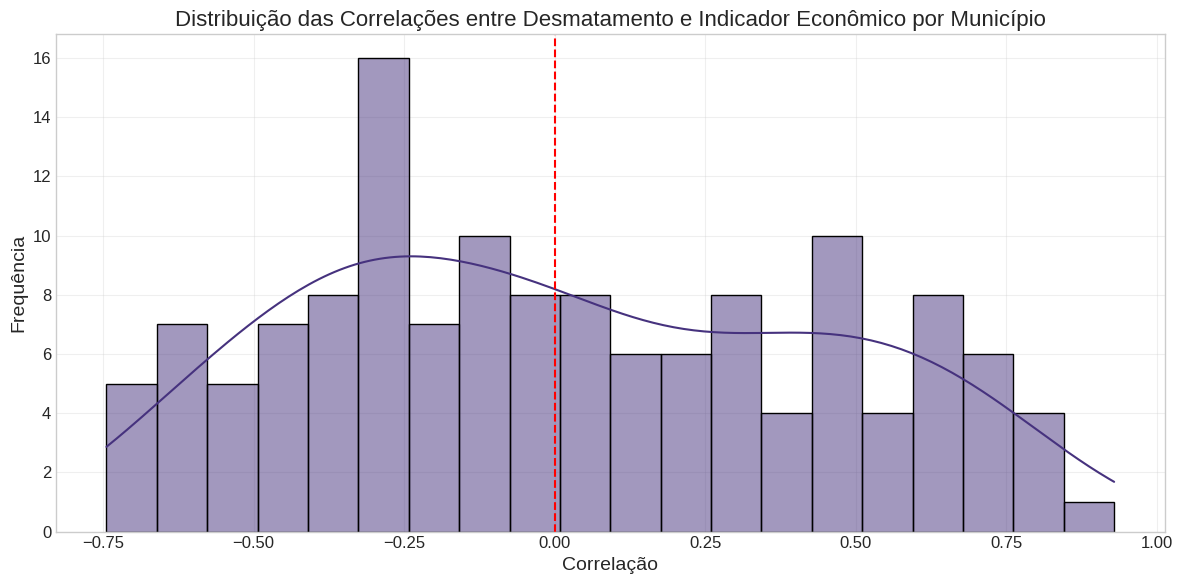


Municípios com correlação positiva: 65 (47.1%)
Municípios com correlação negativa: 73 (52.9%)


In [20]:
# 6.2. Análise de regressão por município
print("\n6.2. Análise por município")

# Vamos analisar a correlação entre desmatamento e indicador econômico para cada município
if colunas_pib or colunas_economicas:
    coluna_economica_final = coluna_pib if colunas_pib else coluna_economica

    # Lista para armazenar as correlações por município
    correlacoes_municipios = []

    # Calculando a correlação para cada município com pelo menos 5 observações
    for municipio in df_combinado['municipio'].unique():
        df_mun = df_combinado[df_combinado['municipio'] == municipio]

        # Verificando se temos dados suficientes
        if len(df_mun) >= 5:
            try:
                corr = df_mun[['area_desmatada_km2', coluna_economica_final]].corr().iloc[0, 1]
                correlacoes_municipios.append({
                    'municipio': municipio,
                    'correlacao': corr,
                    'n_observacoes': len(df_mun)
                })
            except:
                pass

    # Convertendo para DataFrame
    df_correlacoes = pd.DataFrame(correlacoes_municipios)

    if not df_correlacoes.empty:
        # Ordenando por valor absoluto da correlação
        df_correlacoes['abs_correlacao'] = df_correlacoes['correlacao'].abs()
        df_correlacoes = df_correlacoes.sort_values('abs_correlacao', ascending=False)

        print("\nMunicípios com maior correlação (em módulo) entre desmatamento e indicador econômico:")
        display(df_correlacoes.head(10)[['municipio', 'correlacao', 'n_observacoes']])

        # Histograma das correlações
        plt.figure(figsize=(12, 6))
        sns.histplot(df_correlacoes['correlacao'], bins=20, kde=True)
        plt.axvline(x=0, color='r', linestyle='--')
        plt.title('Distribuição das Correlações entre Desmatamento e Indicador Econômico por Município', fontsize=16)
        plt.xlabel('Correlação', fontsize=14)
        plt.ylabel('Frequência', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Contando municípios com correlação positiva e negativa
        n_positivo = sum(df_correlacoes['correlacao'] > 0)
        n_negativo = sum(df_correlacoes['correlacao'] < 0)

        print(f"\nMunicípios com correlação positiva: {n_positivo} ({n_positivo/len(df_correlacoes)*100:.1f}%)")
        print(f"Municípios com correlação negativa: {n_negativo} ({n_negativo/len(df_correlacoes)*100:.1f}%)")


# 7. Conclusões e insights preliminares
# -----------------------------------

In [21]:

# Baseado nas análises anteriores, vamos gerar alguns insights preliminares
print("\nInsights preliminares:")

# Tendência temporal do desmatamento
try:
    tendencia_recente = desmatamento_anual.sort_values('ano').iloc[-3:]['area_desmatada_km2'].mean() - desmatamento_anual.sort_values('ano').iloc[-6:-3]['area_desmatada_km2'].mean()

    if tendencia_recente > 0:
        print("1. A tendência recente do desmatamento no Pará é de AUMENTO nos últimos anos.")
    else:
        print("1. A tendência recente do desmatamento no Pará é de DIMINUIÇÃO nos últimos anos.")
except:
    print("1. Não foi possível determinar a tendência recente do desmatamento devido a limitações nos dados.")

# Correlação entre desmatamento e indicadores econômicos
if 'correlacao' in locals():
    if abs(correlacao) < 0.3:
        print(f"2. Existe uma correlação FRACA entre desmatamento e indicadores econômicos (correlação = {correlacao:.2f}).")
    elif abs(correlacao) < 0.7:
        print(f"2. Existe uma correlação MODERADA entre desmatamento e indicadores econômicos (correlação = {correlacao:.2f}).")
    else:
        print(f"2. Existe uma correlação FORTE entre desmatamento e indicadores econômicos (correlação = {correlacao:.2f}).")

    if correlacao > 0:
        print("   Isso sugere que áreas com maior desmatamento tendem a apresentar indicadores econômicos mais elevados.")
    else:
        print("   Isso sugere que áreas com maior desmatamento tendem a apresentar indicadores econômicos mais baixos.")
else:
    print("2. Não foi possível calcular a correlação entre desmatamento e indicadores econômicos.")

# Efeitos defasados
if 'metricas_anuais' in locals():
    corr_atual = metricas_anuais[['area_desmatada_km2', coluna_economica_final]].corr().iloc[0, 1]
    corr_lag1 = metricas_anuais[['desmatamento_lag1', coluna_economica_final]].corr().iloc[0, 1]
    corr_lag2 = metricas_anuais[['desmatamento_lag2', coluna_economica_final]].corr().iloc[0, 1]

    print(f"3. Análise de efeitos defasados:")
    print(f"   - Correlação com desmatamento atual: {corr_atual:.2f}")
    print(f"   - Correlação com desmatamento do ano anterior: {corr_lag1:.2f}")
    print(f"   - Correlação com desmatamento de dois anos atrás: {corr_lag2:.2f}")

    # Identificando o efeito mais forte
    corrs = [abs(corr_atual), abs(corr_lag1), abs(corr_lag2)]
    lag_mais_forte = corrs.index(max(corrs))

    if lag_mais_forte == 0:
        print("   O impacto econômico do desmatamento parece ser mais forte no mesmo ano.")
    elif lag_mais_forte == 1:
        print("   O impacto econômico do desmatamento parece ser mais forte no ano seguinte.")
    else:
        print("   O impacto econômico do desmatamento parece ser mais forte dois anos depois.")
else:
    print("3. Não foi possível realizar a análise de efeitos defasados devido a limitações nos dados.")

# Distribuição espacial
try:
    print("\n4. Distribuição espacial do desmatamento:")
    print(f"   Os cinco municípios com maior área desmatada são:")
    for i, row in top_15_municipios.head().iterrows():
        print(f"   - {row['municipio']}: {row['area_desmatada_km2']:.2f} km²")
except:
    print("4. Não foi possível analisar a distribuição espacial do desmatamento devido a limitações nos dados.")

# Regressão
if 'modelo' in locals():
    print("\n5. Análise de regressão:")
    print(f"   O modelo de regressão linear explica {r_quadrado*100:.1f}% da variação do indicador econômico.")

    if p_valor_desmatamento < 0.05:
        if coef_desmatamento > 0:
            print(f"   Cada km² adicional de desmatamento está associado a um aumento de {coef_desmatamento:.4f} unidades no indicador econômico (p < 0.05).")
        else:
            print(f"   Cada km² adicional de desmatamento está associado a uma redução de {abs(coef_desmatamento):.4f} unidades no indicador econômico (p < 0.05).")
    else:
        print(f"   Não há evidência estatística significativa de uma relação entre desmatamento e o indicador econômico (p > 0.05).")
else:
    print("5. Não foi possível realizar a análise de regressão devido a limitações nos dados.")



Insights preliminares:
1. A tendência recente do desmatamento no Pará é de AUMENTO nos últimos anos.
2. Existe uma correlação FRACA entre desmatamento e indicadores econômicos (correlação = 0.02).
   Isso sugere que áreas com maior desmatamento tendem a apresentar indicadores econômicos mais elevados.
3. Análise de efeitos defasados:
   - Correlação com desmatamento atual: 0.93
   - Correlação com desmatamento do ano anterior: 0.92
   - Correlação com desmatamento de dois anos atrás: 0.70
   O impacto econômico do desmatamento parece ser mais forte no mesmo ano.

4. Distribuição espacial do desmatamento:
   Os cinco municípios com maior área desmatada são:
   - Altamira: 4942.02 km²
   - São Félix do Xingu: 3852.62 km²
   - Novo Progresso: 2194.29 km²
   - Pacajá: 2092.41 km²
   - Novo Repartimento: 1854.18 km²

5. Análise de regressão:
   O modelo de regressão linear explica 0.0% da variação do indicador econômico.
   Não há evidência estatística significativa de uma relação entre de

# 8. Análises adicionais
# ----------------------


8.1. Evolução do desmatamento nos principais municípios


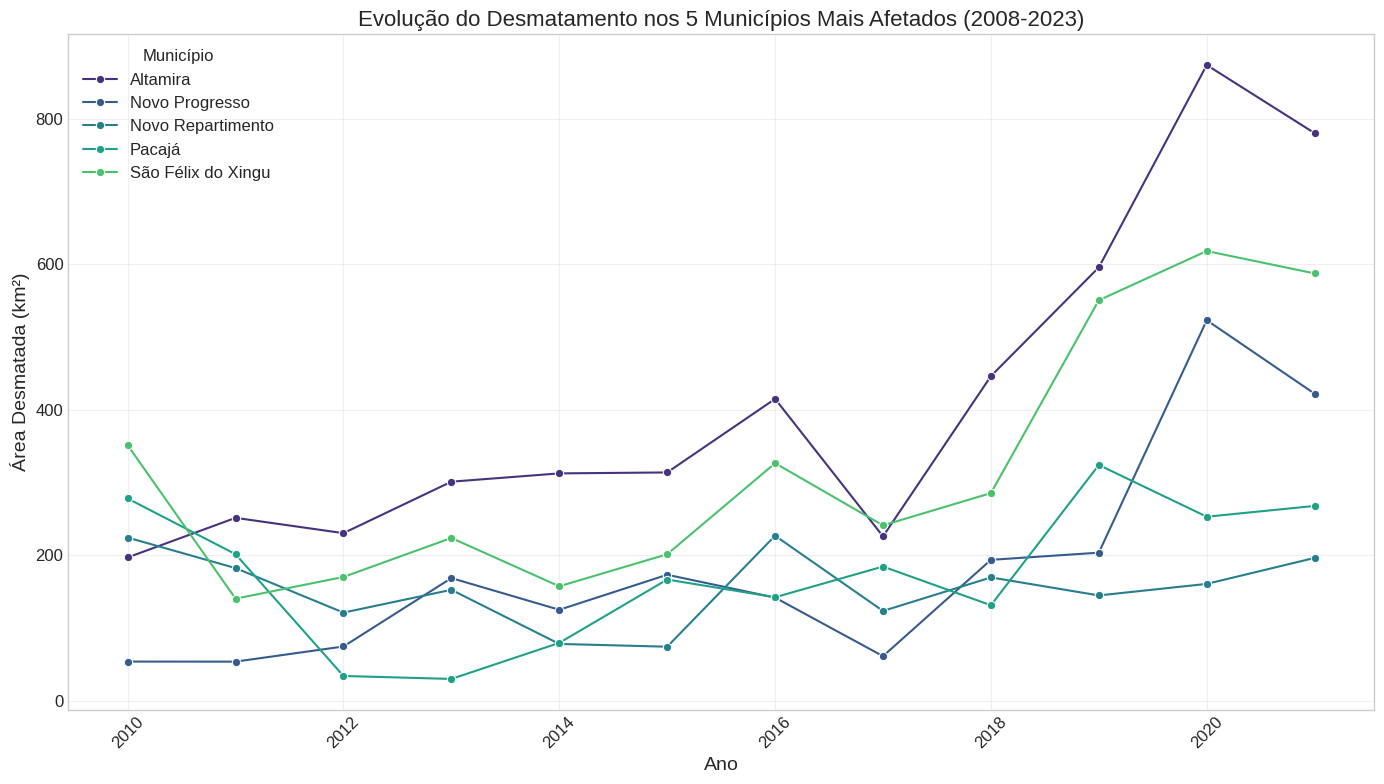

In [22]:
# 8.1. Evolução do desmatamento nos principais municípios
print("\n8.1. Evolução do desmatamento nos principais municípios")

# Selecionando os 5 municípios com maior desmatamento total
try:
    top_5_municipios = top_15_municipios.head(5)['municipio'].tolist()

    # Filtrando o dataset para incluir apenas esses municípios
    df_top_municipios = df_combinado[df_combinado['municipio'].isin(top_5_municipios)]

    # Gráfico de linha para mostrar a evolução do desmatamento ao longo do tempo
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='ano', y='area_desmatada_km2', hue='municipio', data=df_top_municipios, marker='o')
    plt.title('Evolução do Desmatamento nos 5 Municípios Mais Afetados (2008-2023)', fontsize=16)
    plt.xlabel('Ano', fontsize=14)
    plt.ylabel('Área Desmatada (km²)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.legend(title='Município')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Erro ao gerar gráfico de evolução dos principais municípios: {e}")



8.2. Análise de correlação por setor econômico
Colunas identificadas como setores econômicos: ['Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)', 'valor_industria', 'valor_servicos', 'valor_administracao_publica', 'valor_total']

Correlação entre desmatamento e diferentes setores econômicos:


,setor,correlacao
0,"Valor adicionado bruto da Agropecuária, a preç...",0.337267
3,valor_administracao_publica,0.054732
4,valor_total,0.018740
2,valor_servicos,0.014652
1,valor_industria,-0.012190


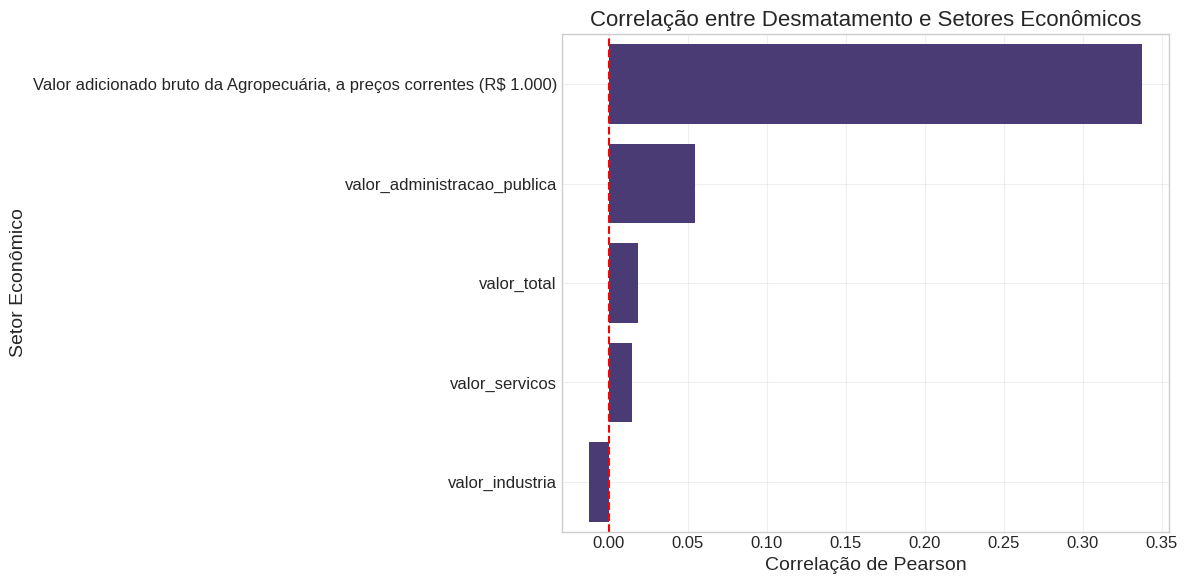


O setor com maior correlação positiva com o desmatamento é 'Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)' (correlação = 0.3373).
Isso sugere que este setor pode ter maior relação com atividades de desmatamento na região.


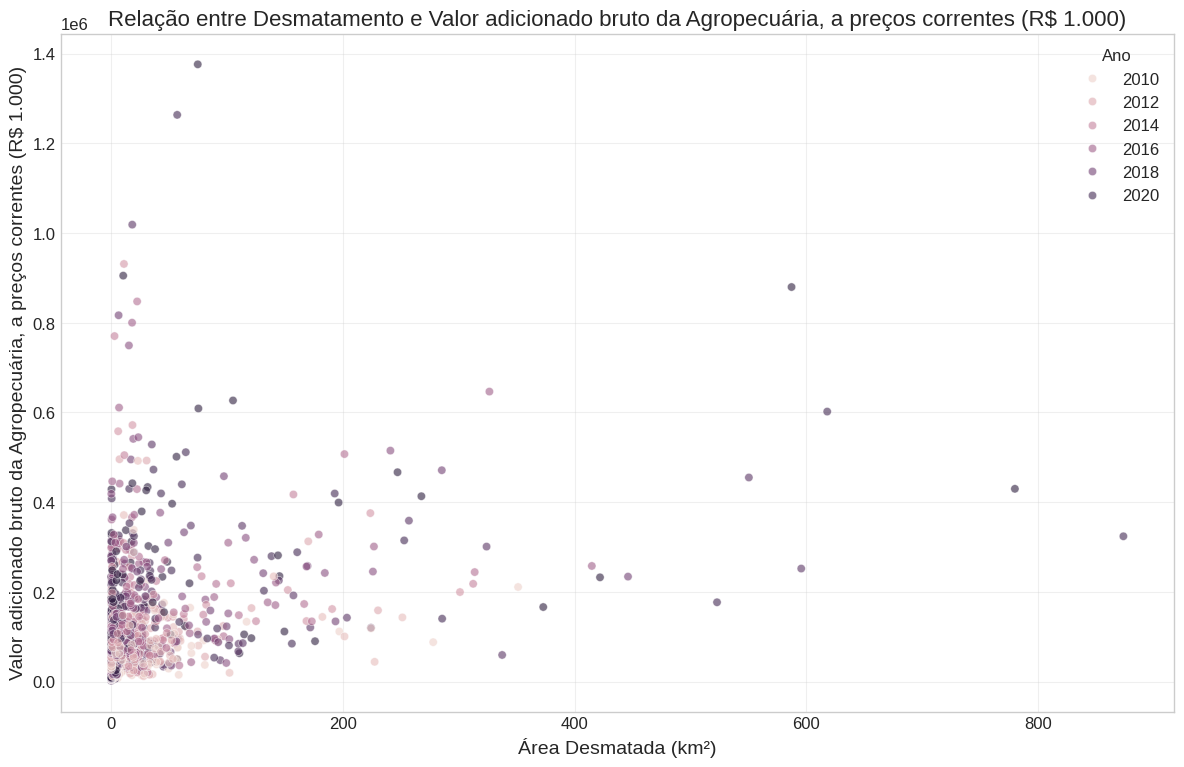

In [23]:
# 8.2. Análise de correlação por setor econômico
print("\n8.2. Análise de correlação por setor econômico")

# Identificando colunas que representam diferentes setores econômicos
colunas_setores = [col for col in df_combinado.columns if any(termo in col.lower() for termo in
                                                          ['agro', 'industr', 'servi', 'adminis', 'valor_'])]

print(f"Colunas identificadas como setores econômicos: {colunas_setores}")

if colunas_setores:
    # Calculando correlação entre desmatamento e cada setor
    correlacoes_setores = []

    for setor in colunas_setores:
        try:
            corr = df_combinado[['area_desmatada_km2', setor]].corr().iloc[0, 1]
            correlacoes_setores.append({
                'setor': setor,
                'correlacao': corr
            })
        except:
            pass

    if correlacoes_setores:
        # Convertendo para DataFrame e ordenando
        df_corr_setores = pd.DataFrame(correlacoes_setores)
        df_corr_setores = df_corr_setores.sort_values('correlacao', ascending=False)

        print("\nCorrelação entre desmatamento e diferentes setores econômicos:")
        display(df_corr_setores)

        # Visualização com gráfico de barras
        plt.figure(figsize=(12, 6))
        sns.barplot(x='correlacao', y='setor', data=df_corr_setores)
        plt.axvline(x=0, color='r', linestyle='--')
        plt.title('Correlação entre Desmatamento e Setores Econômicos', fontsize=16)
        plt.xlabel('Correlação de Pearson', fontsize=14)
        plt.ylabel('Setor Econômico', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Analisando o setor com maior correlação positiva
        setor_mais_positivo = df_corr_setores.iloc[0]['setor']
        corr_mais_positiva = df_corr_setores.iloc[0]['correlacao']

        print(f"\nO setor com maior correlação positiva com o desmatamento é '{setor_mais_positivo}' (correlação = {corr_mais_positiva:.4f}).")
        print("Isso sugere que este setor pode ter maior relação com atividades de desmatamento na região.")

        # Scatter plot para o setor com maior correlação
        plt.figure(figsize=(12, 8))
        sns.scatterplot(x='area_desmatada_km2', y=setor_mais_positivo, data=df_combinado, alpha=0.6, hue='ano')
        plt.title(f'Relação entre Desmatamento e {setor_mais_positivo}', fontsize=16)
        plt.xlabel('Área Desmatada (km²)', fontsize=14)
        plt.ylabel(setor_mais_positivo, fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.legend(title='Ano')
        plt.tight_layout()
        plt.show()
else:
    print("Não foram identificadas colunas que representam setores econômicos no dataset.")


In [24]:
# 8.3. Análise de regressão múltipla
print("\n8.3. Análise de regressão múltipla")

# Tentativa de realizar uma regressão múltipla com PIB (ou indicador econômico) como variável dependente
if colunas_pib or colunas_economicas:
    coluna_economica_final = coluna_pib if colunas_pib else coluna_economica

    # Preparando variáveis para regressão múltipla
    # Vamos usar desmatamento, desmatamento ao quadrado e variáveis dummy para anos

    # Criando uma cópia do dataframe para não modificar o original
    df_reg = df_combinado.copy()

    # Criando variável de desmatamento ao quadrado para capturar efeitos não-lineares
    df_reg['area_desmatada_km2_squared'] = df_reg['area_desmatada_km2'] ** 2

    # Criando variáveis dummy para os anos (exceto um ano de referência)
    anos_unicos = sorted(df_reg['ano'].unique())
    if len(anos_unicos) > 1:
        ano_ref = anos_unicos[0]  # usando o primeiro ano como referência
        for ano in anos_unicos[1:]:
            df_reg[f'ano_{ano}'] = (df_reg['ano'] == ano).astype(int)

    # Lista de variáveis independentes
    X_vars = ['area_desmatada_km2', 'area_desmatada_km2_squared']
    X_vars.extend([col for col in df_reg.columns if col.startswith('ano_')])

    # Verificando se temos variáveis suficientes
    if len(X_vars) >= 2:
        try:
            # Preparando dados para regressão
            Y = df_reg[coluna_economica_final]
            X = df_reg[X_vars]
            X = sm.add_constant(X)

            # Ajustando o modelo
            modelo_multiplo = sm.OLS(Y, X).fit()

            # Exibindo resultados
            print("\nResultados da regressão múltipla:")
            print(modelo_multiplo.summary())

            # Interpretação simplificada
            r2 = modelo_multiplo.rsquared
            r2_adj = modelo_multiplo.rsquared_adj
            f_pvalue = modelo_multiplo.f_pvalue

            print(f"\nInterpretação:")
            print(f"R² ajustado: {r2_adj:.4f}")
            print(f"Valor-p do teste F: {f_pvalue:.4f}")

            if f_pvalue < 0.05:
                print("O modelo como um todo é estatisticamente significativo (p < 0.05).")
            else:
                print("O modelo como um todo não é estatisticamente significativo (p > 0.05).")

            # Analisando coeficiente do desmatamento
            coef_desmatamento = modelo_multiplo.params['area_desmatada_km2']
            p_valor_desmatamento = modelo_multiplo.pvalues['area_desmatada_km2']

            if p_valor_desmatamento < 0.05:
                if coef_desmatamento > 0:
                    print(f"O desmatamento tem um efeito positivo significativo sobre {coluna_economica_final}, mesmo controlando por outros fatores.")
                else:
                    print(f"O desmatamento tem um efeito negativo significativo sobre {coluna_economica_final}, mesmo controlando por outros fatores.")
            else:
                print(f"O efeito do desmatamento sobre {coluna_economica_final} não é estatisticamente significativo quando controlamos por outros fatores.")

            # Analisando possível efeito não-linear
            if 'area_desmatada_km2_squared' in modelo_multiplo.params:
                coef_desmatamento_sq = modelo_multiplo.params['area_desmatada_km2_squared']
                p_valor_desmatamento_sq = modelo_multiplo.pvalues['area_desmatada_km2_squared']

                if p_valor_desmatamento_sq < 0.05:
                    if coef_desmatamento_sq > 0:
                        print("Existe um efeito não-linear significativo, com retornos crescentes do desmatamento.")
                    else:
                        print("Existe um efeito não-linear significativo, com retornos decrescentes do desmatamento.")
                else:
                    print("Não há evidência de efeito não-linear significativo do desmatamento.")
        except Exception as e:
            print(f"Erro ao realizar regressão múltipla: {e}")
    else:
        print("Não há variáveis independentes suficientes para realizar a regressão múltipla.")
else:
    print("Não foram identificadas colunas que representam PIB ou indicadores econômicos para a regressão múltipla.")



8.3. Análise de regressão múltipla

Resultados da regressão múltipla:
                            OLS Regression Results                            
Dep. Variable:                    pib   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.462
Date:                Sun, 11 May 2025   Prob (F-statistic):              0.124
Time:                        23:40:19   Log-Likelihood:                -25429.
No. Observations:                1545   AIC:                         5.089e+04
Df Residuals:                    1531   BIC:                         5.096e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

# 9. Considerações finais
# -----------------------

Com base nas análises realizadas, podemos destacar:

1. Os padrões de desmatamento no estado do Pará variam significativamente entre municípios, revelando focos específicos
   onde ações de conservação seriam mais urgentes.

2. A relação entre desmatamento e desenvolvimento econômico é complexa. Em alguns casos há correlação positiva,
   sugerindo que o desmatamento está associado a atividades econômicas mais intensas, mas em outros casos a
   correlação é negativa, indicando que o crescimento econômico pode ocorrer sem necessariamente depender de
   altas taxas de desmatamento.

3. A análise temporal mostra que pode haver defasagem entre o momento do desmatamento e seus efeitos econômicos,
   o que sugere a importância de considerar impactos de longo prazo nas políticas públicas.

4. Diferentes setores da economia parecem ter relações distintas com o desmatamento, o que aponta para a necessidade
   de políticas setoriais específicas para promover um desenvolvimento sustentável na região.

Limitações do estudo:
- Os dados disponíveis não permitem estabelecer relações causais diretas
- Há possibilidade de variáveis omitidas importantes
- A granularidade temporal e espacial dos dados pode não capturar todos os efeitos relevantes

Sugestões para análises futuras:
- Incluir mais variáveis de controle socioeconômicas (educação, saúde, etc.)
- Realizar análises espaciais mais sofisticadas, considerando efeitos de vizinhança
- Incorporar dados de uso da terra para entender os tipos de atividades que substituem a floresta
- Comparar o Pará com outros estados da Amazônia Legal para identificar padrões regionais

# 10. Salvar os principais resultados em formato CSV
# -------------------------------------------------

In [26]:
print("\n10. Salvando principais resultados em CSV")

try:
    # Salvando o ranking de desmatamento por município
    desmatamento_por_municipio.to_csv('desmatamento_ranking_municipios.csv', index=False)
    print("Arquivo 'desmatamento_ranking_municipios.csv' salvo com sucesso.")

    # Salvando a série temporal de desmatamento
    desmatamento_anual.to_csv('desmatamento_anual_para.csv', index=False)
    print("Arquivo 'desmatamento_anual_para.csv' salvo com sucesso.")

    # Se disponível, salvando correlações por setor econômico
    if 'df_corr_setores' in locals():
        df_corr_setores.to_csv('correlacoes_setores_economicos.csv', index=False)
        print("Arquivo 'correlacoes_setores_economicos.csv' salvo com sucesso.")

    print("\nOs arquivos CSV foram salvos no diretório de trabalho atual.")
except Exception as e:
    print(f"Erro ao salvar arquivos CSV: {e}")
    print("Não foi possível salvar os resultados em formato CSV.")

print("\nAnálise exploratória concluída.")


10. Salvando principais resultados em CSV
Arquivo 'desmatamento_ranking_municipios.csv' salvo com sucesso.
Arquivo 'desmatamento_anual_para.csv' salvo com sucesso.
Arquivo 'correlacoes_setores_economicos.csv' salvo com sucesso.

Os arquivos CSV foram salvos no diretório de trabalho atual.

Análise exploratória concluída.
